In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('encuesta.csv', encoding='UTF-8')

In [3]:
data.head()

,Marca temporal,"¿Practicas regularmente algún tipo de ejercicio de concentración (meditación, yoga, mindfulness, etc.)?",Responde de acuerdo con la frecuencia con la que te ocurren las siguientes oraciones: [Cuando estudio me concentro fácilmente],Responde de acuerdo con la frecuencia con la que te ocurren las siguientes oraciones: [Escucho música mientras estudio],Responde de acuerdo con la frecuencia con la que te ocurren las siguientes oraciones: [La música me ayuda a concentrar],Responde de acuerdo con la frecuencia con la que te ocurren las siguientes oraciones: [Cambio de música según la actividad que realizo],Responde de acuerdo con la frecuencia con la que te ocurren las siguientes oraciones: [Considero que el tipo de música es adecuado para la actividad que realizo],"Si escuchas música mientras estudias, qué géneros prefieres (puedes seleccionar más de uno). Si no escuchas, marca ""ninguno"" al final:",¿Cuáles son tus géneros de música favoritos?,¿Tiene letra?,¿Qué tan energética es?,¿Qué tan predecible es? (repetitiva o estable),¿Cómo es su ritmo?,¿A qué volumen la escuchas?
0,03/06/2021 16:42,No,Casi siempre,A veces,A veces,Casi nunca,Siempre,"Clásica, Pop, Rock",Rock,4,3,3,3,3
1,03/06/2021 16:49,No,Siempre,Siempre,Siempre,Siempre,Siempre,"Clásica, Electrónica, Pop, Soul","Clásica, Electrónica, Pop, Rock",3,2,1,3,4
2,03/06/2021 16:50,No,A veces,A veces,Casi nunca,Siempre,Casi siempre,De ambientación,"Pop, Rap, Rock",2,3,4,3,3
3,03/06/2021 16:50,No,A veces,Casi siempre,Casi siempre,Casi nunca,A veces,"Clásica, Electrónica, Pop","Clásica, Electrónica, Pop",4,4,3,4,3
4,03/06/2021 16:51,No,Casi siempre,A veces,A veces,Casi nunca,A veces,"Clásica, Cumbia, Pop, Rock, Salsa","Cumbia, Pop, Rock, Salsa",5,4,5,5,2


In [4]:
generosEstudia = data.iloc[:,7].to_list()
generosFav = data.iloc[:,8].to_list()


In [5]:
generosEstudia[-2].split(', ')

['Country', 'Pop', 'Rap', 'Reguetón', 'Rock', 'OST']

In [6]:
generosEstudia = [string.split(', ') for string in generosEstudia]
generosFav = [string.split(', ') for string in generosFav]

In [7]:
def conteo_favs_est(lista1, lista2):
    puntaje = 0
    for genero in lista1:
        if genero in lista2:
            puntaje += 1
        else:
            puntaje -= 0.5
    return puntaje

In [8]:
puntajes = [conteo_favs_est(generosEstudia[i], generosFav[i])for i in range(len(generosFav))]
puntajes = np.array(puntajes)
puntajes.reshape(len(puntajes), 1)

array([[ 0. ],
       [ 2.5],
       [-0.5],
       [ 3. ],
       [ 3.5],
       [ 1. ],
       [ 1. ],
       [ 3. ],
       [ 0. ],
       [-1.5],
       [ 1.5],
       [ 0. ],
       [ 4. ],
       [ 3. ],
       [-0.5],
       [-0.5],
       [-0.5],
       [ 0.5],
       [ 1.5],
       [ 5. ],
       [-0.5],
       [ 0. ],
       [-1.5],
       [ 1. ],
       [ 2. ],
       [ 0.5],
       [ 1.5],
       [ 1.5],
       [ 0.5],
       [-0.5],
       [ 1.5],
       [-0.5],
       [ 3. ],
       [-0.5],
       [-0.5],
       [ 1.5],
       [ 3.5],
       [ 0. ],
       [ 1.5]])

In [9]:
puntajes = minmax_scale(puntajes, feature_range=(0,1), copy=True)

In [10]:
puntajes

array([0.23076923, 0.61538462, 0.15384615, 0.69230769, 0.76923077,
       0.38461538, 0.38461538, 0.69230769, 0.23076923, 0.        ,
       0.46153846, 0.23076923, 0.84615385, 0.69230769, 0.15384615,
       0.15384615, 0.15384615, 0.30769231, 0.46153846, 1.        ,
       0.15384615, 0.23076923, 0.        , 0.38461538, 0.53846154,
       0.30769231, 0.46153846, 0.46153846, 0.30769231, 0.15384615,
       0.46153846, 0.15384615, 0.69230769, 0.15384615, 0.15384615,
       0.46153846, 0.76923077, 0.23076923, 0.46153846])

In [11]:
concentrar = data.iloc[:,4].to_list()
cat_to_num = {'Nunca' : 1, 'Casi nunca': 2, 'A veces': 3, 'Casi siempre': 4, 'Siempre': 5}

In [12]:
concentrar = np.array([cat_to_num[i] for i in concentrar])
concentrar.reshape(len(concentrar), 1)

array([[3],
       [5],
       [2],
       [4],
       [3],
       [5],
       [4],
       [3],
       [5],
       [5],
       [4],
       [4],
       [3],
       [3],
       [4],
       [3],
       [1],
       [4],
       [3],
       [3],
       [3],
       [4],
       [3],
       [3],
       [3],
       [2],
       [5],
       [2],
       [3],
       [2],
       [3],
       [2],
       [5],
       [1],
       [3],
       [3],
       [3],
       [3],
       [3]])

In [13]:
concentrar = minmax_scale(concentrar, feature_range=(0,1), copy=True)
concentrar

array([0.5 , 1.  , 0.25, 0.75, 0.5 , 1.  , 0.75, 0.5 , 1.  , 1.  , 0.75,
       0.75, 0.5 , 0.5 , 0.75, 0.5 , 0.  , 0.75, 0.5 , 0.5 , 0.5 , 0.75,
       0.5 , 0.5 , 0.5 , 0.25, 1.  , 0.25, 0.5 , 0.25, 0.5 , 0.25, 1.  ,
       0.  , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ])

In [14]:
puntajes = np.array(list(puntajes)).reshape((-1,1))
concentrar = list(concentrar)

In [15]:
reg = LinearRegression().fit(puntajes, concentrar)

In [16]:
reg.coef_

array([0.1632734])

In [17]:
reg.score(puntajes, concentrar)

0.02362676775345407

In [18]:
a = np.arange(0,1,0.1)
b = [reg.predict([[i]]) for i in a]

Text(0.5, 1.0, 'Concentración vs Relación Géneros Favoritos-Estudiar')

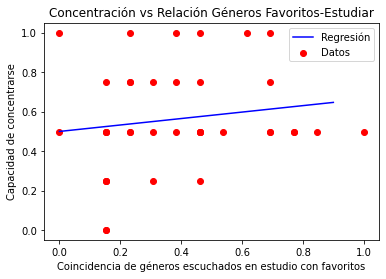

In [19]:
plt.scatter(puntajes, concentrar, label = 'Datos', color = 'r')
plt.plot(a, b, label = 'Regresión', color = 'b')
plt.legend(loc = 'upper right')
plt.xlabel('Coincidencia de géneros escuchados en estudio con favoritos')
plt.ylabel('Capacidad de concentrarse')
plt.title('Concentración vs Relación Géneros Favoritos-Estudiar')